# Re-useable Component: Multi-line time series plot

This component is defined with the following parts:  

1. **data**: the data to be plotted is in a dataframe where the first column is the x-axis and the remaining columns are values to be plotted on the y-axis 
2. **settings**: dictionary for all annotations and stylings, e.g. axis labels, shaded areas, colours, text rotation angle, etc.  


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd 
import numpy as np 
import datetime
import math
import importlib
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib.dates as mdates
from matplotlib.lines import Line2D # for legend

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Palette
Might be useful to have a collection of colours.   

In [3]:
# Line colours
rick_purple='#660159'
rick_purple_light='#d1b2cd'
rick_grey='#7f7e7e' # colour.grey
rich_orange='#D95F02'
rich_orange_light='#F3CAAC'

# Shaded area colours
rich_facecolour='#e1e1e1'

In [4]:
# class font:
#     """
#     Class defining the global font variables for all functions.
#     """
#     leg_font = font_manager.FontProperties(family='Libre Franklin',size=9)
#     normal = 'Libre Franklin'
#     semibold = 'Libre Franklin SemiBold'
    
# mpl.rc('font',family='Libre Franklin')    

In [5]:
# font_manager.FontProperties(family='Libre Franklin',size=9)

# Multi-line reusable component

fonts:
see available fonts in `~/.cache/matplotlib/fontlist-v300.json`.  

Try changing global font to e.g. DejaVu Sans Mono (since this one is installed) to see how to change the global font.  

Ref: https://matplotlib.org/gallery/api/font_family_rc_sgskip.html  

In [6]:
def multi_linechart(df_line, sett):
    '''Creates a line chart of one or more lines.

    Number of lines to plot determined from columns in input dataframe.

    Parameters
    -----------
    df_orig : pandas dataframe
        First column contains x-axis data, subsequent column(s) contain y-axis data.
    sett : dict
        Styling and annotation specification for all visual elements 
        (e.g. axes, grid, lines, legend, title, labels). If empty, defaults are used.
    sett['body'] : dict key, optional
        Global style parameters for 'font-size', 'font-family', and 'fontfamily-list'. 
        If empty, defaults are used.
    sett['body']['font-size'] : int, optional dict key
        Global font size for plot. Default 12.
    sett['body']['font-family'] : str, optional dict key
        Global font family for plot. Default 'sans-serif'.
    sett['body']['fontfamily-list'] : array, optional dict key
        Array of fonts in font-family. The first font in the array that is 
        installed in the system will be used. Default 'Libre Franklin'.
    
    Returns 
    --------
    fig
        Matplotlib fig object
    ax 
        Matplotlib ax object
 
    ''' 
    df=df_line.copy()
    
    # ----------------------------------------------
    # Setup the figure
    fig, ax =plt.subplots(1)
    fig.set_size_inches(18, 5)
    ax = plt.gca()
    
    
    # ----------------------------------------------
    # Default styling params if not defined in sett
    if 'body' in sett:
        dflt={
            'font-size':(12 if 'font-size' not in sett['body']
                         else sett['body']['font-size']),
            'font-family':('sans-serif' if 'font-family' not in sett['body']
                         else sett['body']['font-family']),
            'fontfamily-list':(['Libre Franklin', 'DejaVu Sans'] if 'fontfamily-list' 
                          not in sett['body']
                          else sett['body']['fontfamily-list']),
            'stroke':('#000000' if 'stroke' not in sett['body']
                         else sett['body']['stroke']),
            'stroke-width':(2 if 'stroke-width' not in sett['body']
                         else sett['body']['stroke-width']),
            'border':('solid' if 'border' not in sett['body']
                         else sett['body']['border'])
        }
    else:
        dflt={
            'font-size':12, 'font-family':'sans-serif',
            'fontfamily-list':['Libre Franklin', 'DejaVu Sans'],
            'stroke':'#000000', 'stroke-width':2, 'border':'solid'
        }
 
    print(dflt['font-family'])
    mpl.rcParams['font.family'] = dflt['font-family']
    if dflt['font-family']=='sans-serif':
        mpl.rcParams['font.sans-serif']=dflt['fontfamily-list']
    
#     mpl.rcParams.update({
#         'font.size': dflt['font-size'],
#         'font.family': dflt['font-family']
#     })
    # ----------------------------------------------------------------
    # WEIRD HACK !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    # For some reason, mpl.rcParams needs to be run TWICE before it 
    # actually gets set. So just before calling the function, 
    # make sure you set it again...
    # ----------------------------------------------------------------
    
    
    # ----------------------------------------------
    # Define line-number-dependent params
    num_lines=df.shape[1] - 1
    
    col_names=['xcol']
    ymax_array=[]
    for n in range(num_lines):
        col_names.append('ycol_' + str(n))
        ymax_array.append(df.iloc[:,n+1].max())
        
    df.columns=col_names
    
    # ----------------------------------------------
    # title
    if 'title' in sett:
        if 'title_params' in sett:
            title_size=(
                dflt['font-size'] if 'font-size' not in 
                sett['title_params']
                else sett['title_params']['font-size'])
            loc=('center' if 'loc' not in sett['title_params']
                 else sett['title_params']['loc'])
        ax.set_title(sett['title'], fontsize=title_size,  loc=loc)
    
    # ----------------------------------------------
    # grid
    if 'major_grid_on' in sett and sett['major_grid_on']==True:      
        if 'major_grid' in sett:
            c=('gray' if 'stroke' not in sett['major_grid']
               else sett['major_grid']['stroke'])
            b=('-' if 'border' not in sett['major_grid']
               else sett['major_grid']['border'])
        else: 
            c='gray'
            b='-'
        plt.grid(b=True, which='major', color=c, linestyle=b)
    if 'minor_grid_on' in sett and sett['minor_grid_on']==True:      
        if 'minor_grid' in sett:
            c=('gray' if 'stroke' not in sett['minor_grid']
               else sett['minor_grid']['stroke'])
            b=('-' if 'border' not in sett['minor_grid']
               else sett['minor_grid']['border'])
        else: 
            c='gray'
            b='-'
        plt.grid(b=True, which='minor', color=c, linestyle=b)

    
    # ----------------------------------------------
    # axes (both)
    mpl.rcParams['axes.linewidth'] = 0.3
    ticklength=2 if 'ticklength' not in sett else sett['ticklength']
    tickwidth=1 if 'tickwidth' not in sett else sett['tickwidth']
    ax.tick_params(width=tickwidth, length=ticklength)
    
    # y-axis
    if 'yaxis' in sett:
        ymin=(0 if 'ymin' not in sett['yaxis']
              else sett['yaxis']['ymin'])
        ymax=(np.max(ymax_array)*(1 + 0.1) if 'ymax'
              not in sett['yaxis']
              else sett['yaxis']['ymax'])
        
        # y-axis label
        label=('' if 'label' not in sett['yaxis']
               else sett['yaxis']['label'])
        labelsize=(dflt['font-size'] if 'labelsize'
                   not in sett['yaxis']
                   else sett['yaxis']['labelsize'])
        plt.ylabel(label, fontsize=labelsize)
        
        # Format y-axis tick labels
        ticklabelsize=(dflt['font-size'] if 'ticklabelsize'
                  not in sett['yaxis']
                  else sett['yaxis']['ticklabelsize'])
        ax.tick_params(axis='y', labelsize=ticklabelsize)
        
        # comma format
        precision=('.0f' if 'precision'
                   not in sett['yaxis']
                   else sett['yaxis']['precision'])
        ax.yaxis.set_major_formatter(
            mpl.ticker.StrMethodFormatter('{x:,' + precision + '}')
        )
    else:
        ymin=0
        ymax=np.max(ymax_array)*(1 + 0.1)
        
        # Default y-axis formats
        ax.tick_params(axis='y', labelsize=dflt['font-size'])
        ax.yaxis.set_major_formatter(
            mpl.ticker.StrMethodFormatter('{x:,.0f}') # comma format
        ) 
          
    delta = (ymax - ymin)/4
    i = 0
    while True:
        delta /= 10
        i += 1
        if delta < 10:
            break
    if 'yinc' in sett:
        yinc=sett['yinc']
    else:
        yinc = int(round(delta+1)*pow(10,i))
                   
    plt.ylim(top=ymax, bottom=ymin)
    
    # ----------------------------------------------
    # x-axis
    if 'xaxis' in sett:
        # x-axis label
        label=('' if 'label' not in sett['xaxis']
               else sett['xaxis']['label'])
        labelsize=(dflt['font-size'] if 'labelsize'
                   not in sett['xaxis']
                   else sett['xaxis']['labelsize'])
        plt.xlabel(label, fontsize=labelsize)
        
        # x-axis tick labels
        if 'major_loc' in sett['xaxis']: # x-values are dates  
            date_form_mjr = sett['xaxis']['major_loc']['date_form']
            ax.xaxis.set_major_formatter(date_form_mjr)
        if 'minor_loc' in sett['xaxis']:
            date_form_mnr = sett['xaxis']['minor_loc']['date_form']
            ax.xaxis.set_minor_locator(date_form_mnr)
        
        # x-axis tick label size
        ticklabelsize=(dflt['font-size'] if 'ticklabelsize'
                  not in sett['xaxis']
                  else sett['xaxis']['ticklabelsize'])
        ax.tick_params(axis='x', labelsize=ticklabelsize, 
                       labelbottom=True)
    else:
        # Default x-axis tick lines
        ax.tick_params(axis='x', labelsize=dflt['font-size'],
                       labelbottom=True)
        

    # ----------------------------------------------
    # Plot data and legend
    if 'legend' in sett:
        legend_loc=('upper left' if 'loc' not in sett['legend']
                    else sett['legend']['loc'])
        leg_array=[]
        custom_lines=[]
        
    for n in range(num_lines):
        if 'lines' in sett:
            line_colour=(dflt['stroke'] if 'stroke' not in 
                         sett['lines'][n] 
                         else sett['lines'][n]['stroke'])
            line_width=(dflt['stroke-width'] if 'stroke-width' 
                        not in sett['lines'][n] 
                        else sett['lines'][n]['stroke-width'])
            border_style=(dflt['border'] if 'border-style' not in 
                          sett['lines'][n] 
                          else sett['lines'][n]['border-style'])
        else:
            line_colour=dflt['stroke']
            line_width=dflt['stroke-width']
            border_style=dflt['border']
            
        ax.plot(df['xcol'], df['ycol_' + str(n)], linewidth=line_width, 
                color = line_colour, linestyle=border_style)
        
        # Legend
        if 'legend' in sett:
            leg_array.append(sett['lines'][n]['label'])
            custom_lines.append(Line2D([0], [0], 
                                       color=line_colour, 
                                       lw=line_width,
                                       linestyle=border_style)
                               )
    
    if 'legend' in sett:
        ax.legend(custom_lines, leg_array, loc=legend_loc, 
                  prop={"size": dflt['font-size']},
                  ncol=len(df.columns))

    
    # ----------------------------------------------
    # Plot shaded areas
    if 'shaded' in sett:
        num_a=len(sett['shaded'].keys())
        
        for area in range(num_a):
            idx=sett['shaded'][area]['lims']
            facecolour=sett['shaded'][area]['fill']
            zorder=(0 if 'zorder' not in sett['shaded'][area] 
                    else sett['shaded'][area]['zorder'])
            alpha=(1 if 'alpha' not in sett['shaded'][area]
                   else sett['shaded'][area]['alpha'])
            
            # Shaded area left and right bds
            for i in range(len(idx)):
                bd1=idx[i][0]
                bd2=idx[i][1]
                
                ax.axvspan(bd1, bd2, facecolor=facecolour, 
                           edgecolor='none', alpha=alpha,
                           zorder=zorder)
            
            # Shaded area label
            if 'label' in sett['shaded'][area]:
                rot=(0 if 'rotation' not in 
                     sett['shaded'][area]['label'] 
                     else sett['shaded'][area]['label']['rotation'])
                label_colour=(dflt['stroke'] if 'colour' not in 
                              sett['shaded'][area]['label'] 
                              else sett['shaded'][area]['label']['colour'])
                label_size=(dflt['font-size'] if 'font-size' not in 
                            sett['shaded'][area]['label'] 
                            else sett['shaded'][area]['label']['font-size'])
                plt.text(                    
                    sett['shaded'][area]['label']['x'], # x posn of label
                    sett['shaded'][area]['label']['y'], # y posn of label
                    sett['shaded'][area]['label']['text'], 
                    rotation=rot, 
                    color=label_colour, 
                    fontsize=label_size
                )

    return fig, ax

# 1. Demo dataset 1: Time series, dt=day
*Recall: `multi_linechart()` expects dataframe with first column for the x-axis and subsequent columns for plotting on the y-axis.*  

Demo dataset 1 is a time series of interval one day. The x-axis labels will display major formatters at mid-month with tick label format `2020-mm-dd` and minor formatters at every other day with no labels.   

In [7]:
# x-axis
dt=[datetime.date(2020, 10, 27), datetime.date(2020, 10, 28), datetime.date(2020, 10, 29), 
    datetime.date(2020, 10, 30), datetime.date(2020, 10, 31), datetime.date(2020, 11, 1), 
    datetime.date(2020, 11, 2), datetime.date(2020, 11, 3), datetime.date(2020, 11, 4), 
    datetime.date(2020, 11, 5), datetime.date(2020, 11, 6), datetime.date(2020, 11, 7), 
    datetime.date(2020, 11, 8), datetime.date(2020, 11, 9), datetime.date(2020, 11, 10), 
    datetime.date(2020, 11, 11), datetime.date(2020, 11, 12), datetime.date(2020, 11, 13), 
    datetime.date(2020, 11, 14), datetime.date(2020, 11, 15), datetime.date(2020, 11, 16), 
    datetime.date(2020, 11, 17), datetime.date(2020, 11, 18), datetime.date(2020, 11, 19), 
    datetime.date(2020, 11, 20), datetime.date(2020, 11, 21), datetime.date(2020, 11, 22), 
    datetime.date(2020, 11, 23), datetime.date(2020, 11, 24), datetime.date(2020, 11, 25), 
    datetime.date(2020, 11, 26), datetime.date(2020, 11, 27), datetime.date(2020, 11, 28), 
    datetime.date(2020, 11, 29), datetime.date(2020, 11, 30), datetime.date(2020, 12, 1), 
    datetime.date(2020, 12, 2), datetime.date(2020, 12, 3), datetime.date(2020, 12, 4), 
    datetime.date(2020, 12, 5), datetime.date(2020, 12, 6), datetime.date(2020, 12, 7), 
    datetime.date(2020, 12, 8), datetime.date(2020, 12, 9), datetime.date(2020, 12, 10), 
    datetime.date(2020, 12, 11), datetime.date(2020, 12, 12), datetime.date(2020, 12, 13)]

In [8]:
# y-axis
# line 1
y1=[32512.0, 34852.0, 35136.0, 38154.0, 35551.0, 27617.0, 33677.0, 34163.0, 34606.0, 35106.0, 38034.0, 36077.0, 30372.0, 34616.0, 34264.0, 34162.0, 34891.0, 36871.0, 34465.0, 25836.0, 41818.0, 42943.0, 42199.0, 44307.0, 49460.0, 47071.0, 31263.0, 38039.0, 39162.0, 29431.0, 42445.0, 45586.0, 42333.0, 35198.0, 39244.0, 38740.0, 41345.0, 43083.0, 43299.0, 41210.0, 32797.0, 40363.0, 41577.0, 38094.0, 43813.0, 46515.0, 38156.0, 28232.0]

# line 2
y2=[38781.0, 41387.0, 40545.0, 42473.0, 35726.0, 28066.0, 36873.0, 38191.0, 39432.0, 40123.0, 42199.0, 37404.0, 32564.0, 38425.0, 40460.0, 39506.0, 39780.0, 40666.0, 34904.0, 25290.0, 35852.0, 37037.0, 36880.0, 38007.0, 40274.0, 35163.0, 23323.0, 33689.0, 35129.0, 12352.0, 36524.0, 38759.0, 32995.0, 29132.0, 33974.0, 32964.0, 35851.0, 37296.0, 36458.0, 31332.0, 26148.0, 34649.0, 35588.0, 34950.0, 36615.0, 38317.0, 29245.0, 21929.0]

# line 3
y3=[21713.0, 23644.0, 22949.0, 24473.0, 21201.0, 16189.0, 21592.0, 21946.0, 23200.0, 23324.0, 25188.0, 23107.0, 20544.0, 23035.0, 24334.0, 23354.0, 23144.0, 23411.0, 20691.0, 14232.0, 20965.0, 21615.0, 20784.0, 21851.0, 24003.0, 20617.0, 13727.0, 19809.0, 20124.0, 8755.0, 20952.0, 22788.0, 20327.0, 17183.0, 19609.0, 19223.0, 20557.0, 21295.0, 20377.0, 17362.0, 14867.0, 19576.0, 20172.0, 19520.0, 20884.0, 22209.0, 16241.0, 12449.0]

In [9]:
data = {'dt':dt, 'y1':y1, 'y2':y2, 'y3':y3}

df_multi = pd.DataFrame(data) 

df_multi.head()

,dt,y1,y2,y3
0,2020-10-27,32512.0,38781.0,21713.0
1,2020-10-28,34852.0,41387.0,23644.0
2,2020-10-29,35136.0,40545.0,22949.0
3,2020-10-30,38154.0,42473.0,24473.0
4,2020-10-31,35551.0,35726.0,21201.0


## Example: plot data with no options
The `multi_linechart()` function can be customized with user preferences in the settings dict. If an empty settings dict is passed, the function will just use defaults.

In [10]:
sett_empty={
    
}

sans-serif


(<Figure size 1296x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b98a947f0>)

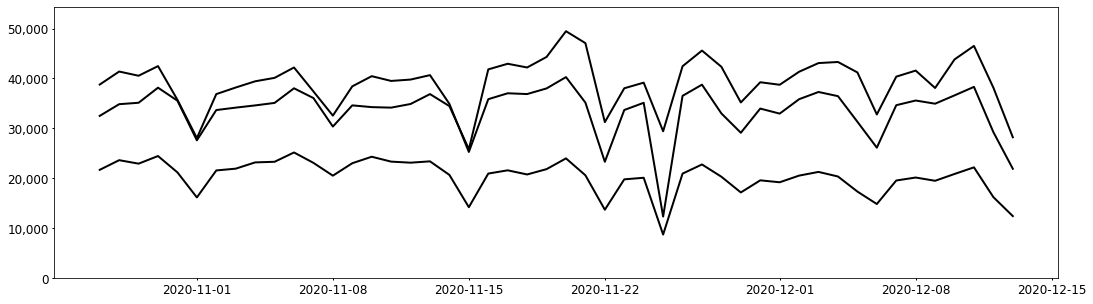

In [11]:
multi_linechart(df_multi, sett_empty)

## Example: one shaded area with legend

In [12]:
sett = {
    'body': {
        'font-size': 16,
        'font-family': 'sans-serif'
#         'font-family': 'monospace'
#         'fontfamily-list': ['Libre Franklin', 'DejaVu Sans'],
    },
    
    # Axes labels and limits
    'yaxis': {
        'label': 'Daily Volume',
        'labelsize': 18
    },
    'xaxis': {
#         'ticklabelsize': 8,
        'major_loc': {
            'loc': mdates.DayLocator(),
            'date_form': mdates.DateFormatter('%Y-%m-%d')
        },
        'minor_loc': {
            'date_form': mdates.DayLocator(interval=1),  # every other day
        }
    },
    
    # grid
    'major_grid_on': True,
    'minor_grid_on': True,
    'minor_grid': {
        'stroke': '#D3D3D3',
        'border': '--'
    },
    
    # legend
    'legend': {
        'loc': 'lower left'
    },

    'lines': {
        0: {
            'stroke': '#1A75B5',
            'border-style': 'solid',
            'label': 'Vol 1'
            },
        1: {
            'stroke': '#FF7F00',
            'border-style': 'solid',
            'label': 'Vol 2'
            },
        2: {
            'stroke': '#28A026',
            'border-style': 'dashed',
            'label': 'Vol 3'
            }
    },
    
    'shaded': {
        0: {
            'lims':[[pd.to_datetime('2020-11-23'), pd.to_datetime('2020-12-22')]],
            'fill': 'magenta',
            'zorder':-100,
            'alpha': 0.3,
            'label': {
                'x': pd.to_datetime('2020-11-23') + datetime.timedelta(days=.5),
                'y': 51000,
                'text': 'Lockdown 2',
                'font-size': 14, 
                'colour': 'k',
                'rotation': 0
            }
        }
    }
}

# ----------------------------------------------------------------
# WEIRD HACK !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# For some reason, you need to run mpl.rcParams TWICE before it 
# actually gets set. The mpl.rcParams is already specified in 
# multi_linechart() but here we run it for the second time otherwise
# the font.family will not be updated
if 'body' in sett:
    if 'font-family' in sett['body']:
        mpl.rcParams['font.family'] = sett['body']['font-family']
        print(mpl.rcParams['font.family'])

['sans-serif']


sans-serif


(<Figure size 1296x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b97ff5048>)

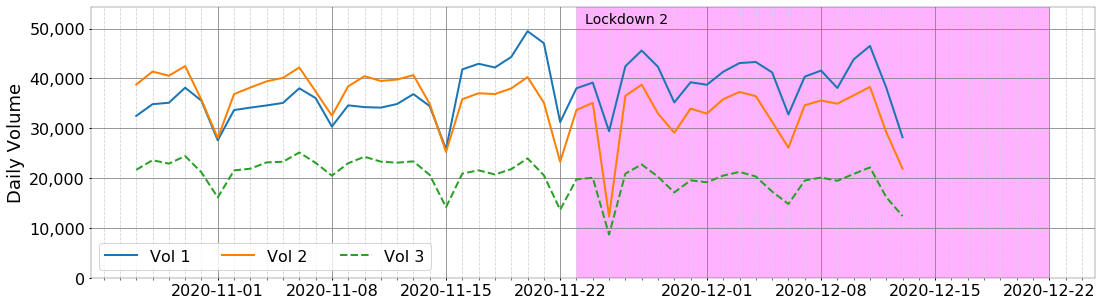

In [13]:
multi_linechart(df_multi, sett)

## Example: one shaded area with no legend
In this case, simply do not include `legend` in the settings dict.  

In [14]:
sett = {
    'body': {
        'font-size': 16,
        'font-family': 'sans-serif'
#         'font-family': 'monospace'
#         'fontfamily-list': ['Libre Franklin', 'DejaVu Sans'],
    },
    
    # Axes labels and limits
    'yaxis': {
        'label': 'Daily Volume'
    },
    'xaxis': {
         'major_loc': {
            'loc': mdates.DayLocator(),
            'date_form': mdates.DateFormatter('%Y-%m-%d')
        },
        'minor_loc': {
            'date_form': mdates.DayLocator(interval=1),  # every other day
        }
    },
   
    # grid
    'major_grid_on': True,
    'minor_grid_on': True,
    'minor_grid': {
        'stroke': '#D3D3D3',
        'border': '--'
    },
    
    # legend
#     'legend': {
#         'loc': 'lower left'
#     },

    'lines': {
        0: {
            'stroke': '#1A75B5',
            'border-style': 'solid',
            'label': 'Vol 1'
            },
        1: {
            'stroke': '#FF7F00',
            'border-style': 'solid',
            'label': 'Vol 2'
            },
        2: {
            'stroke': '#28A026',
            'border-style': 'dashed',
            'label': 'Vol 3'
            }
    },
    
    'shaded': {
        0: {
            'lims':[[pd.to_datetime('2020-11-23'), pd.to_datetime('2020-12-22')]],
            'fill': 'magenta',
            'zorder':-100,
            'alpha': 0.3,
            'label': {
                'x': pd.to_datetime('2020-11-23') + datetime.timedelta(days=.5),
                'y': 51000,
                'text': 'Lockdown 2',
                'font-size': 12, 
                'colour': 'k',
                'rotation': 0
            }
        }
    }
}

# ----------------------------------------------------------------
# WEIRD HACK !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# For some reason, you need to run mpl.rcParams TWICE before it 
# actually gets set. The mpl.rcParams is already specified in 
# multi_linechart() but here we run it for the second time otherwise
# the font.family will not be updated
if 'body' in sett:
    if 'font-family' in sett['body']:
        mpl.rcParams['font.family'] = sett['body']['font-family']
        print(mpl.rcParams['font.family'])

['sans-serif']


sans-serif


(<Figure size 1296x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b98187c18>)

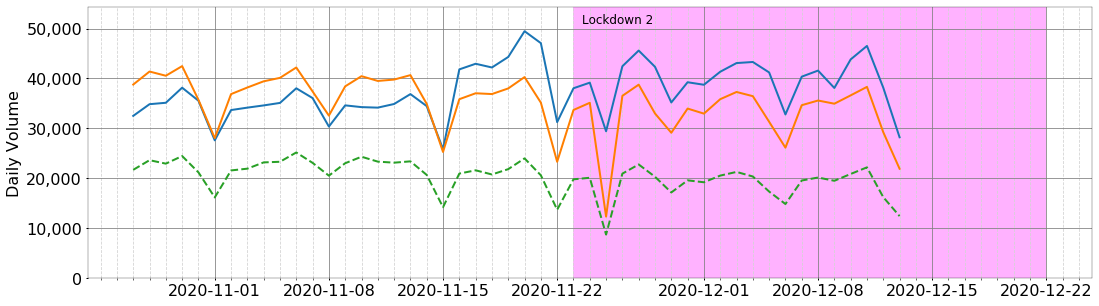

In [15]:
multi_linechart(df_multi, sett)

## Example: one shaded area block and shaded weekends

In [16]:
def find_weekend_indices(df):
    '''Outputs a 2D list of weekend date pairs given date column
    in df. Assumes first column of df is the date column. 
    Datetime pairs output in `datetime.date()` format.
    '''
    xcol=list(df)[0]
    datetime_array=df[xcol]
    
    s = []
    for i in range(len(datetime_array) - 1):
        if datetime_array[i].weekday() >= 5:
            s.append([df[xcol][i], df[xcol][i + 1]])

    return s

In [17]:
sett = {
    'body': {
        'font-size': 16,
        'font-family': 'sans-serif'
#         'font-family': 'monospace'
#         'fontfamily-list': ['Libre Franklin', 'DejaVu Sans'],
    },
    
    # Axes labels and limits
    'yaxis': {
        'label': 'Daily Volume'
    },
   'xaxis': {
        'major_loc': {
            'loc': mdates.DayLocator(),
            'date_form': mdates.DateFormatter('%Y-%m-%d')
        },
        'minor_loc': {
            'date_form': mdates.DayLocator(interval=1),  # every other day
        }
   },
    
    # grid
    'major_grid_on': True,
    'minor_grid_on': True,
    'minor_grid': {
        'stroke': '#D3D3D3',
        'border': '--'
    },
    
    # legend
    'legend': {
        'loc': 'lower left'
    },

    'lines': {
        0: {
            'stroke': '#1A75B5',
            'border-style': 'solid',
            'label': 'Vol 1'
            },
        1: {
            'stroke': '#FF7F00',
            'border-style': 'solid',
            'label': 'Vol 2'
            },
        2: {
            'stroke': '#28A026',
            'border-style': 'dashed',
            'label': 'Vol 3'
            }
    },
    
    'shaded': {
        0: {
            'lims':[[pd.to_datetime('2020-11-23'), pd.to_datetime('2020-12-22')]],
            'fill': 'magenta',
            'zorder':-100,
            'alpha': 0.3,
            'label': {
                'x': pd.to_datetime('2020-11-23') + datetime.timedelta(days=.5),
                'y': 51000,
                'text': 'Lockdown 2',
                'font-size': 12, 
                'colour': 'k',
                'rotation': 0
            }
        },
        1:{
            'lims':find_weekend_indices(df_multi),
            'fill': '#ccffff',
            'alpha': 0.9 
        }
    }
}

# ----------------------------------------------------------------
# WEIRD HACK !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# For some reason, you need to run mpl.rcParams TWICE before it 
# actually gets set. The mpl.rcParams is already specified in 
# multi_linechart() but here we run it for the second time otherwise
# the font.family will not be updated
if 'body' in sett:
    if 'font-family' in sett['body']:
        mpl.rcParams['font.family'] = sett['body']['font-family']
        print(mpl.rcParams['font.family'])

['sans-serif']


sans-serif


(<Figure size 1296x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b98093978>)

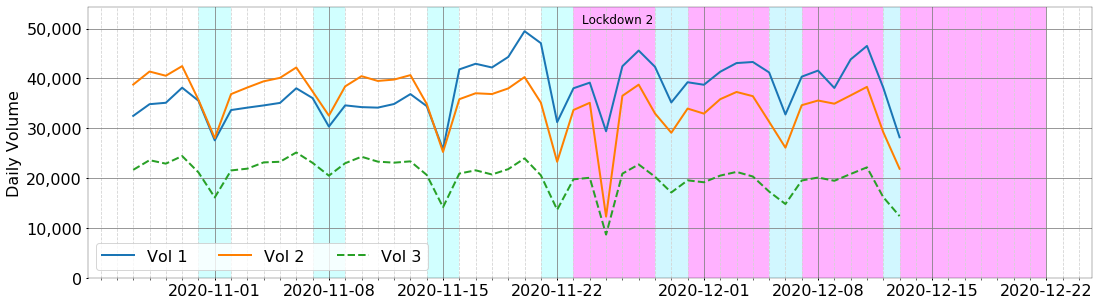

In [18]:
multi_linechart(df_multi, sett)

sans-serif


(<Figure size 1296x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b981689e8>)

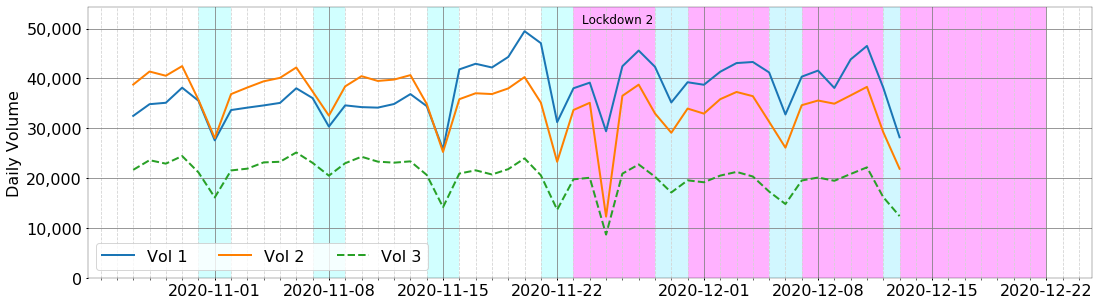

In [19]:
# From jupyterhub python 3.7.3 -- do not run this cell
multi_linechart(df_multi, sett)

# 2. Demo dataset 2: Time series, dt=week
*Recall: `multi_linechart()` expects dataframe with first column for the x-axis and subsequent columns for plotting on the y-axis.*  

Demo dataset 2 is a time series of interval one week. The x-axis labels will display major formatters at the beginning of each month with tick label format `Month 2020` with no minor formatters.   

In [20]:
# x-axis
dt=[datetime.date(2020, 3, 2), datetime.date(2020, 3, 9), datetime.date(2020, 3, 16),
 datetime.date(2020, 3, 23), datetime.date(2020, 3, 30), datetime.date(2020, 4, 6),
 datetime.date(2020, 4, 13), datetime.date(2020, 4, 20), datetime.date(2020, 4, 27),
 datetime.date(2020, 5, 4), datetime.date(2020, 5, 11), datetime.date(2020, 5, 18),
 datetime.date(2020, 5, 25), datetime.date(2020, 6, 1), datetime.date(2020, 6, 8),
 datetime.date(2020, 6, 15), datetime.date(2020, 6, 22), datetime.date(2020, 6, 29),
 datetime.date(2020, 7, 6), datetime.date(2020, 7, 13), datetime.date(2020, 7, 20),
 datetime.date(2020, 7, 27), datetime.date(2020, 8, 3), datetime.date(2020, 8, 10),
 datetime.date(2020, 8, 17), datetime.date(2020, 8, 24), datetime.date(2020, 8, 31),
 datetime.date(2020, 9, 7), datetime.date(2020, 9, 14), datetime.date(2020, 9, 21),
 datetime.date(2020, 9, 28), datetime.date(2020, 10, 5), datetime.date(2020, 10, 12),
 datetime.date(2020, 10, 19), datetime.date(2020, 10, 26), datetime.date(2020, 11, 2),
 datetime.date(2020, 11, 9), datetime.date(2020, 11, 16), datetime.date(2020, 11, 23),
 datetime.date(2020, 11, 30), datetime.date(2020, 12, 7), datetime.date(2020, 12, 14),
 datetime.date(2020, 12, 21)]

In [21]:
# y-axis
# line 1
y1=[3.02419154469977, 2.99366865138892, 3.01353809216413, 2.94186347516395, 
    2.91332271246307, 2.85854109197429, 2.76872546877112, 2.78244466517205, 
    2.80764274213638, 2.8278348673446, 2.86467544770234, 2.93833179196963, 
    3.04626618237813, 3.16676205506535, 3.28103887911297, 3.35355551396727, 
    3.34208204007746, 3.25669746732819, 3.17398421787229, 3.52702041518902, 
    3.36175550875315, 3.43543771859161, 3.46184881819421, 3.39627431340217, 
    3.45251678604306, 3.36192265573067, 3.28741494612631, 3.41652033593208, 
    3.43777865122018, 3.559692291405, 3.62069747424247, 3.53457172965231, 
    3.6070483160655, 3.453403523385, 3.36935265094359, 3.36505056886525, 
    3.36338414780305, 3.46275960914892, 3.57316348930405, 3.68714315432472, 
    3.66860658603494, 3.67472332954439, 3.76077270931965]

# line 2
y2=[3.3476508435181, 3.34162449143467, 3.29143411887978, 3.20832068142402, 
    3.0444437080988, 2.96262032539521, 2.87133674454897, 2.78501655455216, 
    2.8052951558961, 2.77239410340245, 2.895799536075, 3.08327480548404, 
    3.11639758687515, 3.08325346461171, 3.17695908159152, 3.11328424430024, 
    3.19594501163704, 3.3297219084822, 3.28634035925014, 3.12982527373787, 
    3.40590817897924, 3.46371365112992, 3.41350665405673, 3.46861429547781, 
    3.53659710047626, 3.51540618545213, 3.52835746425794, 3.49468728369239, 
    3.45740090923564, 3.60688753404378, 3.64078554093756, 3.7534552474586, 
    3.69179732241833, 3.61680979570243, 3.58041540692345, 3.55924344209829, 
    3.4953445280816, 3.42200446103196, 3.39171787006797, 3.33203969856659, 
    3.38935538041984, 3.43726313816507, 3.47380763318113]


In [22]:
data = {'dt':dt, 'y1':y1, 'y2':y2}

df_tt = pd.DataFrame(data) 

print(df_tt.shape)
df_tt.head()

(43, 3)


,dt,y1,y2
0,2020-03-02,3.024192,3.347651
1,2020-03-09,2.993669,3.341624
2,2020-03-16,3.013538,3.291434
3,2020-03-23,2.941863,3.208321
4,2020-03-30,2.913323,3.044444


In [31]:
sett = {
    'body': {
        'font-size': 16,
        'font-family': 'sans-serif'
#         'font-family': 'monospace'
#         'fontfamily-list': ['Libre Franklin', 'DejaVu Sans'],
    },
    
    # Title, Axes labels and limits
    'title': 'AM Peak Period',
    'title_params': {
        'font-size': 18,
        'loc': 'left'
    },
    'ticklength': 4,
    'yaxis': {
        'ymax': 5.7,
        'precision': '.1f',
        'label': 'Travel Time (min)'
    },
    'xaxis': {
       'major_loc': {
            'loc': mdates.DayLocator(),
            'date_form': mdates.DateFormatter('%Y-%m-%d')
        }
#         'minor_loc': {
#             'date_form': mdates.DayLocator(interval=1),  # every other day
#         }  
    },
   
    'major_grid_on': False, # or can omit this setting
    
    # legend
    'legend': {
        'loc': 'lower left'
    },

    'lines': {
        0: {
            'stroke': '#660159',
            'stroke-width': 4,
            'border-style': 'solid',
            'label': 'Southbound'
            },
        1: {
            'stroke': '#D95F02',
            'stroke-width': 4,
            'border-style': 'solid',
            'label': 'Northbound'
            }
    },
    
    'shaded': { 
        0: {
            'lims':[[pd.to_datetime('2020-05-18'), pd.to_datetime('2020-06-29')]],
            'fill': '#e1e1e1',
            'zorder':-100,
            'alpha': 0.5,
            'label': {
                'x': pd.to_datetime('2020-05-18') + datetime.timedelta(days=.5),
                'y': 4.3,
                'text': 'Before',
                'font-size': 16, 
                'colour': '#707070',
                'rotation': 90
            }
        },
        1: {
            'lims':[[pd.to_datetime('2020-07-06'), pd.to_datetime('2020-07-13')]],
            'fill': '#e1e1e1',
            'zorder':-100,
            'alpha': 0.5,
            'label': {
                'x': pd.to_datetime('2020-07-06') + datetime.timedelta(days=.5),
                'y': 3.8,
                'text': 'Installation',
                'font-size': 16, 
                'colour': '#707070',
                'rotation': 90
            }
        },
        2: {
            'lims':[[pd.to_datetime('2020-07-27'), pd.to_datetime('2020-09-18')]],
            'fill': '#e1e1e1',
            'zorder':-100,
            'alpha': 0.5,
            'label': {
                'x': pd.to_datetime('2020-07-27') + datetime.timedelta(days=.5),
                'y': 4.35,
                'text': 'After',
                'font-size': 16, 
                'colour': '#707070',
                'rotation': 90
            }
        }
    }
}

# ----------------------------------------------------------------
# WEIRD HACK !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# For some reason, you need to run mpl.rcParams TWICE before it 
# actually gets set. The mpl.rcParams is already specified in 
# multi_linechart() but here we run it for the second time otherwise
# the font.family will not be updated
if 'body' in sett:
    if 'font-family' in sett['body']:
        mpl.rcParams['font.family'] = sett['body']['font-family']
        print(mpl.rcParams['font.family'])

['sans-serif']


sans-serif


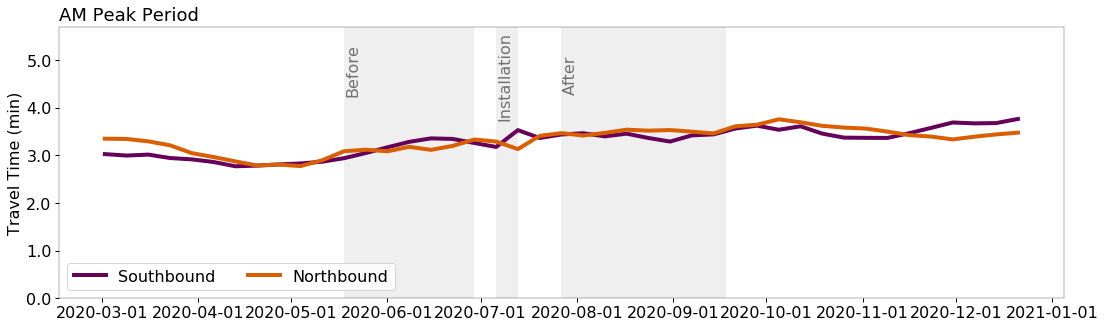

In [32]:
fig, ax = multi_linechart(df_tt, sett)

In [25]:
# fname='test_multi'
# plt.savefig(fname, dpi=300, bbox_inches='tight')